Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.


/tmp/ipython-input-668727489.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<Figure size 800x500 with 0 Axes>

<Axes: xlabel='DayOfWeek'>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday (Monday–Friday)')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Total Pedestrian Count')

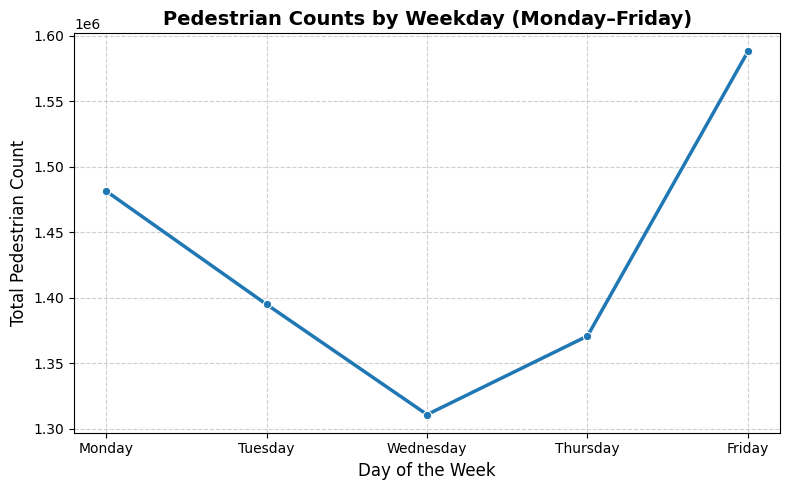

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_df = df[df['DayOfWeek'].isin(weekdays)]

weekday_counts = (
    weekday_df.groupby('DayOfWeek')['Pedestrians']
.sum()
.reindex(weekdays)
)


plt.figure(figsize=(8,5))
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', linewidth=2.5)

plt.title('Pedestrian Counts by Weekday (Monday–Friday)', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Pedestrian Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

/tmp/ipython-input-3603160518.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


Average Pedestrian Count by Weather Condition (2019):


,weather_summary,Pedestrians
4,partly-cloudy-day,1574.093627
0,clear-day,1382.183298
9,wind,679.000000
2,cloudy,543.225041
6,rain,229.822076
8,snow,222.631579
3,fog,212.409091
7,sleet,178.250000
5,partly-cloudy-night,52.765922
1,clear-night,33.233871



Correlation Matrix (2019):


,Pedestrians,temperature,precipitation
Pedestrians,1.000000,0.358757,-0.105432
temperature,0.358757,1.000000,0.001911
precipitation,-0.105432,0.001911,1.000000


<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Weather vs Pedestrian Activity (2019)')

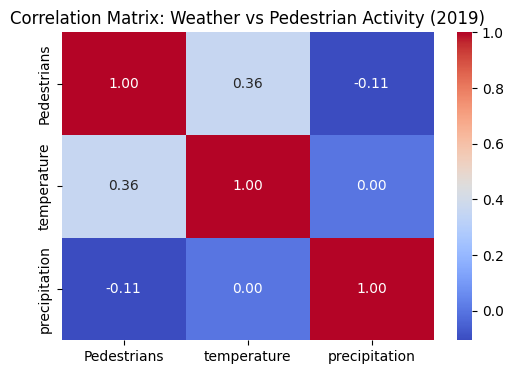

<Figure size 1000x500 with 0 Axes>

/tmp/ipython-input-3603160518.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_summary', y='Pedestrians', data=weather_summary, palette='viridis')


<Axes: xlabel='weather_summary', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Average Pedestrian Count by Weather Condition (2019)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'partly-cloudy-day'),
  Text(1, 0, 'clear-day'),
  Text(2, 0, 'wind'),
  Text(3, 0, 'cloudy'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'snow'),
  Text(6, 0, 'fog'),
  Text(7, 0, 'sleet'),
  Text(8, 0, 'partly-cloudy-night'),
  Text(9, 0, 'clear-night')])

Text(0, 0.5, 'Average Pedestrian Count')

Text(0.5, 0, 'Weather Condition')

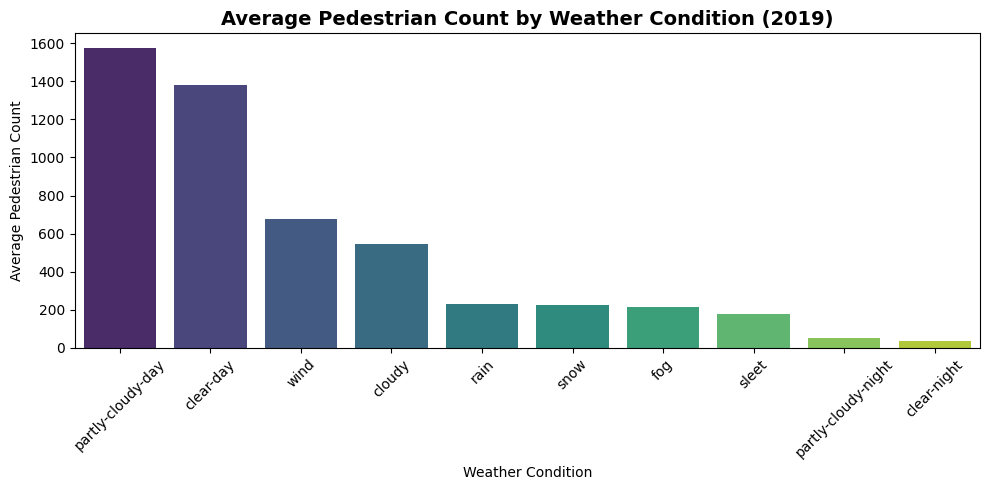

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')


df_2019 = df[df['hour_beginning'].dt.year == 2019]


df_2019 = df_2019.dropna(subset=['Pedestrians', 'weather_summary'])


weather_summary = (
    df_2019.groupby('weather_summary', as_index=False)['Pedestrians']
    .mean()
    .sort_values(by='Pedestrians', ascending=False)
)

print("Average Pedestrian Count by Weather Condition (2019):")
display(weather_summary)

corr_matrix = df_2019[['Pedestrians', 'temperature', 'precipitation']].corr()


print("\nCorrelation Matrix (2019):")
display(corr_matrix)


plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Weather vs Pedestrian Activity (2019)')
plt.show()


plt.figure(figsize=(10,5))
sns.barplot(x='weather_summary', y='Pedestrians', data=weather_summary, palette='viridis')
plt.title('Average Pedestrian Count by Weather Condition (2019)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Average Pedestrian Count')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()


Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

/tmp/ipython-input-1094867564.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
/tmp/ipython-input-1094867564.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Hour'] = df_2019['hour_beginning'].dt.hour
/tmp/ipython-input-1094867564.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,TimeOfDay,Pedestrians
0,Afternoon,1795.699178
1,Evening,866.973288
2,Morning,560.629354
3,Night,12.267717


<Figure size 800x500 with 0 Axes>

/tmp/ipython-input-1094867564.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=timeofday_summary, x='TimeOfDay', y='Pedestrians', palette='viridis')


<Axes: xlabel='TimeOfDay', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Average Pedestrian Activity by Time of Day (2019)')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrian Count')

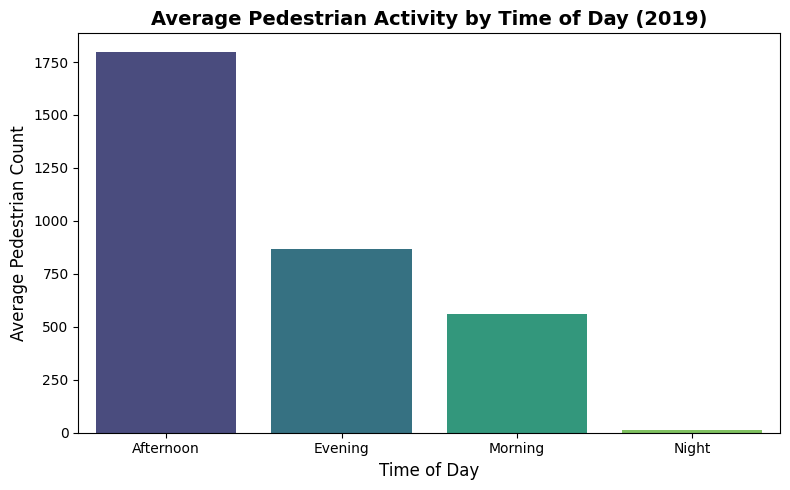

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, sep=',')

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df_2019 = df[df['hour_beginning'].dt.year == 2019]

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_2019['Hour'] = df_2019['hour_beginning'].dt.hour
df_2019['TimeOfDay'] = df_2019['Hour'].apply(categorize_time_of_day)

timeofday_summary = (
    df_2019.groupby('TimeOfDay', as_index=False)['Pedestrians']
    .mean()
    .sort_values(by='Pedestrians', ascending=False)
)

display(timeofday_summary)

plt.figure(figsize=(8,5))
sns.barplot(data=timeofday_summary, x='TimeOfDay', y='Pedestrians', palette='viridis')
plt.title('Average Pedestrian Activity by Time of Day (2019)', fontsize=14, weight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Pedestrian Count', fontsize=12)
plt.tight_layout()
plt.show()
